# Chapter 3: 振動 (Oscillation)

このノートブックでは、三角関数と振動について学びます。

- 角度と角運動
- 三角関数（sin, cos, tan）
- 極座標
- 単振動（Simple Harmonic Motion）
- バネ
- 振り子

In [1]:
using Plots
using LinearAlgebra
using Random
gr()

Plots.GRBackend()

## 3.1 角度と角運動

角度はラジアンで表すのが一般的です。
- 360° = 2π ラジアン
- 180° = π ラジアン
- 90° = π/2 ラジアン

In [2]:
# 度からラジアンへの変換
deg2rad_custom(degrees) = degrees * π / 180
rad2deg_custom(radians) = radians * 180 / π

println("90° = ", deg2rad_custom(90), " rad")
println("π rad = ", rad2deg_custom(π), "°")

90° = 1.5707963267948966

 rad
π rad = 180.0°


### 角速度と角加速度

回転する物体には、線形運動と同様に角度、角速度、角加速度があります。

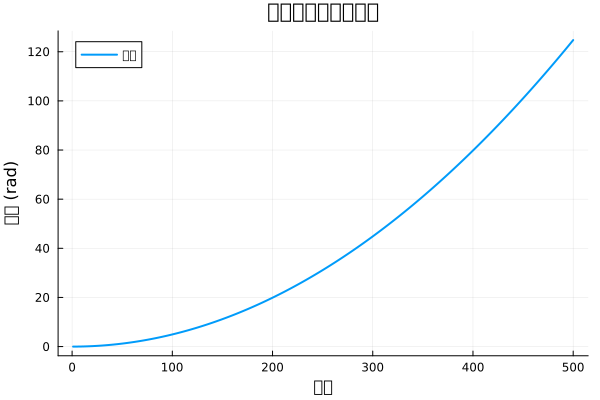

GKS: glyph missing from current font: 35282
GKS: glyph missing from current font: 21152
GKS: glyph missing from current font: 36895
GKS: glyph missing from current font: 24230
GKS: glyph missing from current font: 12395
GKS: glyph missing from current font: 12424
GKS: glyph missing from current font: 12427
GKS: glyph missing from current font: 22238
GKS: glyph missing from current font: 36578
GKS: glyph missing from current font: 26178
GKS: glyph missing from current font: 38291
GKS: glyph missing from current font: 35282
GKS: glyph missing from current font: 24230
GKS: glyph missing from current font: 35282
GKS: glyph missing from current font: 21152
GKS: glyph missing from current font: 36895
GKS: glyph missing from current font: 24230
GKS: glyph missing from current font: 12395
GKS: glyph missing from current font: 12424
GKS: glyph missing from current font: 12427
GKS: glyph missing from current font: 22238
GKS: glyph missing from current font: 36578
GKS: glyph missing from current 

In [3]:
# 回転するオブジェクト
mutable struct Rotator
    angle::Float64
    angular_velocity::Float64
    angular_acceleration::Float64
end

Rotator() = Rotator(0.0, 0.0, 0.001)

function update!(r::Rotator)
    r.angular_velocity += r.angular_acceleration
    r.angle += r.angular_velocity
end

# シミュレーション
rotator = Rotator()
angles = Float64[]

for _ in 1:500
    push!(angles, rotator.angle)
    update!(rotator)
end

plot(angles, label="角度", xlabel="時間", ylabel="角度 (rad)", 
     title="角加速度による回転", linewidth=2)

## 3.2 三角関数

sin, cos, tanは角度と辺の関係を表す関数です。

単位円上では：
- x = cos(θ)
- y = sin(θ)

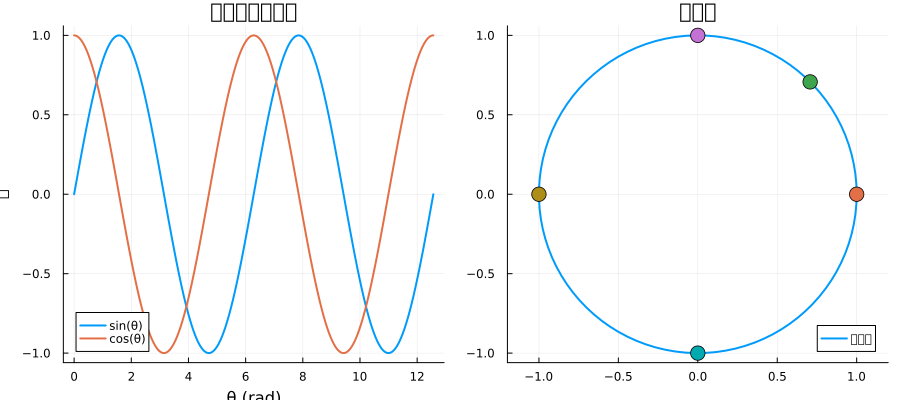

GKS: glyph missing from current font: 27491
GKS: glyph missing from current font: 24358
GKS: glyph missing from current font: 27874
GKS: glyph missing from current font: 12392
GKS: glyph missing from current font: 20313
GKS: glyph missing from current font: 24358
GKS: glyph missing from current font: 27874
GKS: glyph missing from current font: 20516
GKS: glyph missing from current font: 21336
GKS: glyph missing from current font: 20301
GKS: glyph missing from current font: 20870
GKS: glyph missing from current font: 27491
GKS: glyph missing from current font: 24358
GKS: glyph missing from current font: 27874
GKS: glyph missing from current font: 12392
GKS: glyph missing from current font: 20313
GKS: glyph missing from current font: 24358
GKS: glyph missing from current font: 27874
GKS: glyph missing from current font: 20516
GKS: glyph missing from current font: 20516
GKS: glyph missing from current font: 20516
GKS: glyph missing from current font: 20516
GKS: glyph missing from current 

In [4]:
# 三角関数の可視化
θ = range(0, 4π, length=200)

p1 = plot(θ, sin.(θ), label="sin(θ)", linewidth=2)
plot!(p1, θ, cos.(θ), label="cos(θ)", linewidth=2)
xlabel!(p1, "θ (rad)")
ylabel!(p1, "値")
title!(p1, "正弦波と余弦波")

# 単位円
angles = range(0, 2π, length=100)
p2 = plot(cos.(angles), sin.(angles), label="単位円", aspect_ratio=:equal, linewidth=2)

# いくつかの点をプロット
for a in [0, π/4, π/2, π, 3π/2]
    scatter!(p2, [cos(a)], [sin(a)], markersize=8, label="")
end
title!(p2, "単位円")

plot(p1, p2, layout=(1, 2), size=(900, 400))

## 3.3 極座標

極座標は、原点からの距離rと角度θで位置を表します。

デカルト座標への変換：
- x = r * cos(θ)
- y = r * sin(θ)

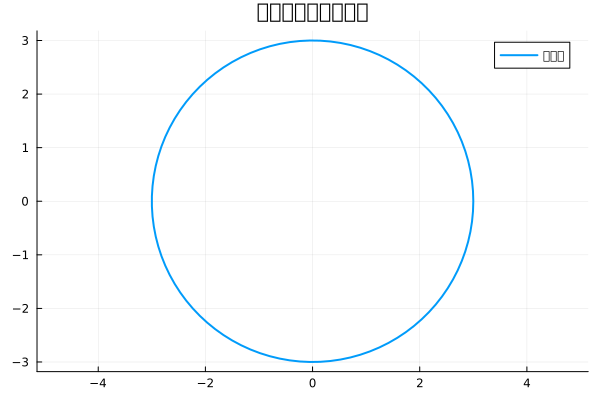

GKS: glyph missing from current font: 26997
GKS: glyph missing from current font: 24231
GKS: glyph missing from current font: 27161
GKS: glyph missing from current font: 12395
GKS: glyph missing from current font: 12424
GKS: glyph missing from current font: 12427
GKS: glyph missing from current font: 20870
GKS: glyph missing from current font: 36939
GKS: glyph missing from current font: 21205
GKS: glyph missing from current font: 26997
GKS: glyph missing from current font: 24231
GKS: glyph missing from current font: 27161
GKS: glyph missing from current font: 12395
GKS: glyph missing from current font: 12424
GKS: glyph missing from current font: 12427
GKS: glyph missing from current font: 20870
GKS: glyph missing from current font: 36939
GKS: glyph missing from current font: 21205
GKS: glyph missing from current font: 20870
GKS: glyph missing from current font: 36939
GKS: glyph missing from current font: 21205
GKS: glyph missing from current font: 26997
GKS: glyph missing from current 

In [5]:
# 極座標からデカルト座標への変換
polar_to_cartesian(r, θ) = (r * cos(θ), r * sin(θ))
cartesian_to_polar(x, y) = (sqrt(x^2 + y^2), atan(y, x))

# 円運動のシミュレーション
r = 3.0
θ_values = range(0, 2π, length=100)

x_values = [polar_to_cartesian(r, θ)[1] for θ in θ_values]
y_values = [polar_to_cartesian(r, θ)[2] for θ in θ_values]

plot(x_values, y_values, label="円運動", aspect_ratio=:equal, 
     linewidth=2, title="極座標による円運動")

### スパイラルパターン

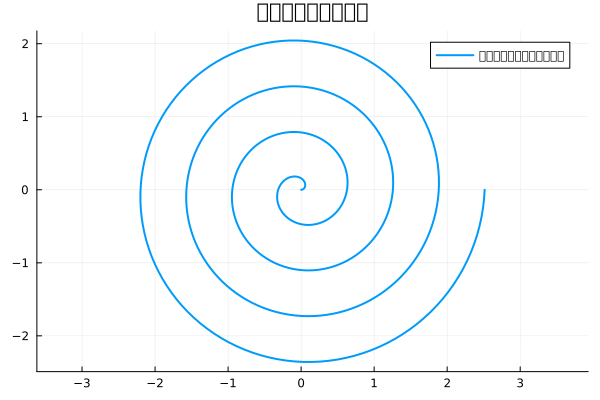

GKS: glyph missing from current font: 12473
GKS: glyph missing from current font: 12497
GKS: glyph missing from current font: 12452
GKS: glyph missing from current font: 12521
GKS: glyph missing from current font: 12523
GKS: glyph missing from current font: 12497
GKS: glyph missing from current font: 12479
GKS: glyph missing from current font: 12540
GKS: glyph missing from current font: 12531
GKS: glyph missing from current font: 12473
GKS: glyph missing from current font: 12497
GKS: glyph missing from current font: 12452
GKS: glyph missing from current font: 12521
GKS: glyph missing from current font: 12523
GKS: glyph missing from current font: 12497
GKS: glyph missing from current font: 12479
GKS: glyph missing from current font: 12540
GKS: glyph missing from current font: 12531
GKS: glyph missing from current font: 12450
GKS: glyph missing from current font: 12523
GKS: glyph missing from current font: 12461
GKS: glyph missing from current font: 12513
GKS: glyph missing from current 

In [6]:
# スパイラルの描画
θ_spiral = range(0, 8π, length=500)
r_spiral = 0.1 .* θ_spiral  # rがθに比例して増加

x_spiral = r_spiral .* cos.(θ_spiral)
y_spiral = r_spiral .* sin.(θ_spiral)

plot(x_spiral, y_spiral, label="アルキメデスのスパイラル", 
     aspect_ratio=:equal, linewidth=2, title="スパイラルパターン")

## 3.4 単振動（Simple Harmonic Motion）

単振動は、sinまたはcos関数で記述される周期的な運動です。

位置 = 振幅 × sin(角振動数 × 時間)

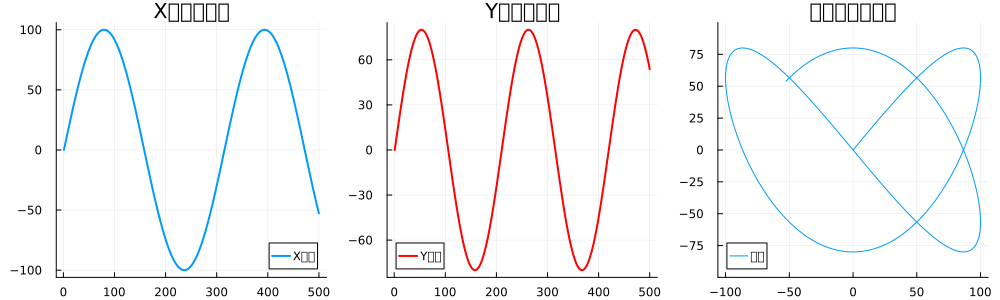

GKS: glyph missing from current font: 26041
GKS: glyph missing from current font: 21521
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 25391
GKS: glyph missing from current font: 21205
GKS: glyph missing from current font: 26041
GKS: glyph missing from current font: 21521
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 25391
GKS: glyph missing from current font: 21205
GKS: glyph missing from current font: 12522
GKS: glyph missing from current font: 12469
GKS: glyph missing from current font: 12540
GKS: glyph missing from current font: 12472
GKS: glyph missing from current font: 12517
GKS: glyph missing from current font: 22259
GKS: glyph missing from current font: 24418
GKS: glyph missing from current font: 26041
GKS: glyph missing from current font: 21521
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 25391
GKS: glyph missing from current font: 21205
GKS: glyph missing from current 

In [7]:
# 単振動オブジェクト
mutable struct Oscillator
    amplitude::Vector{Float64}  # x, y の振幅
    angle::Vector{Float64}      # 現在の角度
    velocity::Vector{Float64}   # 角速度
end

function Oscillator()
    Oscillator(
        [rand() * 100 + 50, rand() * 100 + 50],
        [0.0, 0.0],
        [rand() * 0.05, rand() * 0.05]
    )
end

function update!(osc::Oscillator)
    osc.angle .+= osc.velocity
end

function position(osc::Oscillator)
    x = osc.amplitude[1] * sin(osc.angle[1])
    y = osc.amplitude[2] * sin(osc.angle[2])
    return [x, y]
end

# シミュレーション
osc = Oscillator()
osc.amplitude = [100.0, 80.0]
osc.velocity = [0.02, 0.03]

positions_x = Float64[]
positions_y = Float64[]

for _ in 1:500
    pos = position(osc)
    push!(positions_x, pos[1])
    push!(positions_y, pos[2])
    update!(osc)
end

p1 = plot(positions_x, label="X位置", linewidth=2, title="X方向の振動")
p2 = plot(positions_y, label="Y位置", linewidth=2, title="Y方向の振動", color=:red)
p3 = plot(positions_x, positions_y, label="軌跡", linewidth=1, 
          title="リサージュ図形", aspect_ratio=:equal)

plot(p1, p2, p3, layout=(1, 3), size=(1000, 300))

### 波の伝播

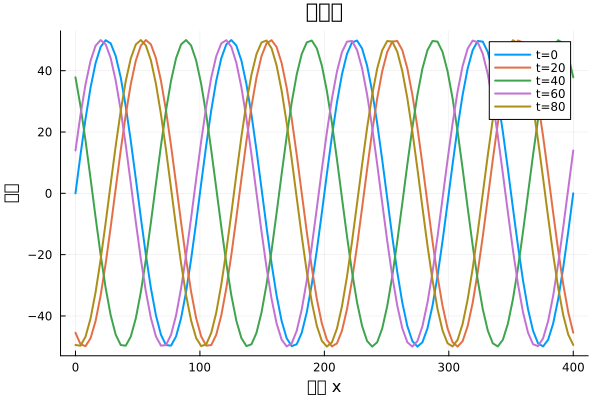

GKS: glyph missing from current font: 36914
GKS: glyph missing from current font: 34892
GKS: glyph missing from current font: 27874
GKS: glyph missing from current font: 20301
GKS: glyph missing from current font: 32622
GKS: glyph missing from current font: 25391
GKS: glyph missing from current font: 24133
GKS: glyph missing from current font: 36914
GKS: glyph missing from current font: 34892
GKS: glyph missing from current font: 27874
GKS: glyph missing from current font: 20301
GKS: glyph missing from current font: 32622
GKS: glyph missing from current font: 25391
GKS: glyph missing from current font: 24133
GKS: glyph missing from current font: 20301
GKS: glyph missing from current font: 32622
GKS: glyph missing from current font: 20301
GKS: glyph missing from current font: 32622
GKS: glyph missing from current font: 20301
GKS: glyph missing from current font: 32622
GKS: glyph missing from current font: 25391
GKS: glyph missing from current font: 24133
GKS: glyph missing from current 

In [8]:
# 波の可視化
amplitude = 50.0
wavelength = 100.0
k = 2π / wavelength  # 波数
ω = 0.1  # 角振動数

x = range(0, 400, length=100)

# 異なる時刻での波
p = plot(title="進行波", xlabel="位置 x", ylabel="振幅", legend=:topright)
for t in 0:20:80
    y = amplitude .* sin.(k .* x .- ω * t)
    plot!(p, x, y, label="t=$t", linewidth=2)
end
p

## 3.5 バネ（Spring）

フックの法則: F = -k × x

バネの力は変位に比例し、平衡位置に向かいます。

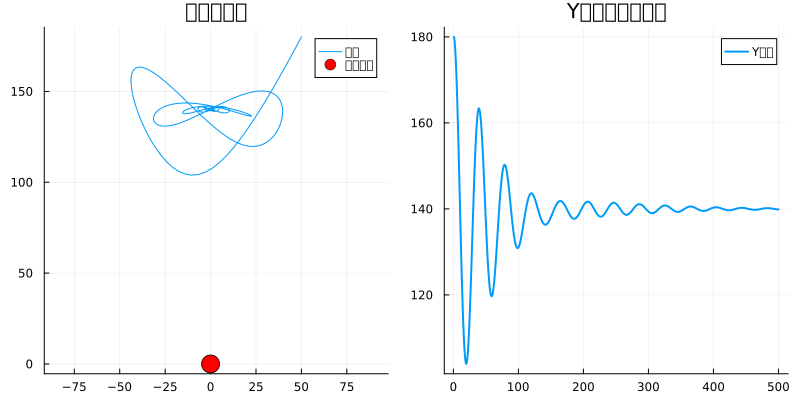

GKS: glyph missing from current font: 12496
GKS: glyph missing from current font: 12493
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 36939
GKS: glyph missing from current font: 21205
GKS: glyph missing from current font: 24231
GKS: glyph missing from current font: 27161
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 26178
GKS: glyph missing from current font: 38291
GKS: glyph missing from current font: 22793
GKS: glyph missing from current font: 21270
GKS: glyph missing from current font: 12496
GKS: glyph missing from current font: 12493
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 36939
GKS: glyph missing from current font: 21205
GKS: glyph missing from current font: 36556
GKS: glyph missing from current font: 36321
GKS: glyph missing from current font: 12450
GKS: glyph missing from current font: 12531
GKS: glyph missing from current font: 12459
GKS: glyph missing from current 

In [9]:
# バネ接続されたオブジェクト
mutable struct SpringBob
    position::Vector{Float64}
    velocity::Vector{Float64}
    acceleration::Vector{Float64}
    mass::Float64
end

SpringBob() = SpringBob([0.0, 150.0], [0.0, 0.0], [0.0, 0.0], 1.0)

struct Spring
    anchor::Vector{Float64}
    rest_length::Float64
    k::Float64  # バネ定数
end

Spring() = Spring([0.0, 0.0], 100.0, 0.1)

function spring_force(spring::Spring, bob::SpringBob)
    # バネの方向ベクトル
    direction = bob.position - spring.anchor
    current_length = norm(direction)
    
    # 伸び量
    stretch = current_length - spring.rest_length
    
    # フックの法則: F = -k * x
    force_magnitude = -spring.k * stretch
    
    # 方向を正規化して力を計算
    if current_length > 0
        force = (direction / current_length) * force_magnitude
    else
        force = [0.0, 0.0]
    end
    
    return force
end

function applyforce!(bob::SpringBob, force::Vector{Float64})
    bob.acceleration .+= force ./ bob.mass
end

function update!(bob::SpringBob)
    bob.velocity .+= bob.acceleration
    bob.position .+= bob.velocity
    bob.acceleration .= 0.0
end

# シミュレーション
spring = Spring([0.0, 0.0], 100.0, 0.05)
bob = SpringBob([50.0, 180.0], [0.0, 0.0], [0.0, 0.0], 2.0)
gravity = [0.0, 1.0]  # 重力
damping = 0.98

bob_positions = Vector{Vector{Float64}}()

for _ in 1:500
    push!(bob_positions, copy(bob.position))
    
    # 重力
    applyforce!(bob, gravity .* bob.mass)
    
    # バネの力
    sf = spring_force(spring, bob)
    applyforce!(bob, sf)
    
    update!(bob)
    bob.velocity .*= damping  # 減衰
end

# プロット
x_pos = [p[1] for p in bob_positions]
y_pos = [p[2] for p in bob_positions]

p1 = plot(x_pos, y_pos, label="軌跡", linewidth=1, 
          title="バネの運動", aspect_ratio=:equal)
scatter!(p1, [spring.anchor[1]], [spring.anchor[2]], 
         markersize=10, label="アンカー", color=:red)

p2 = plot(y_pos, label="Y位置", linewidth=2, title="Y座標の時間変化")

plot(p1, p2, layout=(1, 2), size=(800, 400))

### 複数のバネで接続された系

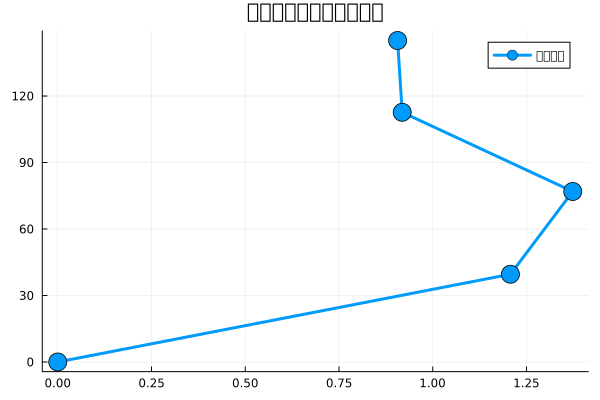

GKS: glyph missing from current font: 12496
GKS: glyph missing from current font: 12493
GKS: glyph missing from current font: 12481
GKS: glyph missing from current font: 12455
GKS: glyph missing from current font: 12540
GKS: glyph missing from current font: 12531
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 24179
GKS: glyph missing from current font: 34913
GKS: glyph missing from current font: 29366
GKS: glyph missing from current font: 24907
GKS: glyph missing from current font: 12496
GKS: glyph missing from current font: 12493
GKS: glyph missing from current font: 12481
GKS: glyph missing from current font: 12455
GKS: glyph missing from current font: 12540
GKS: glyph missing from current font: 12531
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 24179
GKS: glyph missing from current font: 34913
GKS: glyph missing from current font: 29366
GKS: glyph missing from current font: 24907
GKS: glyph missing from current 

In [10]:
# チェーン状のバネシステム
mutable struct ChainNode
    position::Vector{Float64}
    velocity::Vector{Float64}
    acceleration::Vector{Float64}
    fixed::Bool
end

ChainNode(pos, fixed=false) = ChainNode(copy(pos), [0.0, 0.0], [0.0, 0.0], fixed)

function update!(node::ChainNode, damping=0.98)
    if !node.fixed
        node.velocity .+= node.acceleration
        node.velocity .*= damping
        node.position .+= node.velocity
    end
    node.acceleration .= 0.0
end

# 5ノードのチェーンを作成
n_nodes = 5
rest_length = 30.0
k_chain = 0.2
gravity_chain = [0.0, 0.5]

nodes = [ChainNode([0.0, Float64(i * rest_length)], i == 0) for i in 0:n_nodes-1]

# 初期位置をずらす
nodes[end].position[1] = 50.0

chain_history = []

for step in 1:300
    # 現在の位置を記録
    push!(chain_history, [copy(n.position) for n in nodes])
    
    # バネ力を計算
    for i in 1:n_nodes-1
        n1, n2 = nodes[i], nodes[i+1]
        direction = n2.position - n1.position
        current_len = norm(direction)
        stretch = current_len - rest_length
        
        if current_len > 0
            force = (direction / current_len) * (k_chain * stretch)
            if !n1.fixed
                n1.acceleration .+= force
            end
            if !n2.fixed
                n2.acceleration .-= force
            end
        end
    end
    
    # 重力を適用
    for node in nodes
        if !node.fixed
            node.acceleration .+= gravity_chain
        end
    end
    
    # 更新
    for node in nodes
        update!(node)
    end
end

# 最終状態をプロット
final_positions = chain_history[end]
x_chain = [p[1] for p in final_positions]
y_chain = [p[2] for p in final_positions]

plot(x_chain, y_chain, marker=:circle, markersize=10, 
     linewidth=3, label="チェーン", title="バネチェーンの平衡状態")

## 3.6 振り子（Pendulum）

単振り子の運動方程式：
θ'' = -(g/L) × sin(θ)

ここで、θは角度、gは重力加速度、Lは紐の長さです。

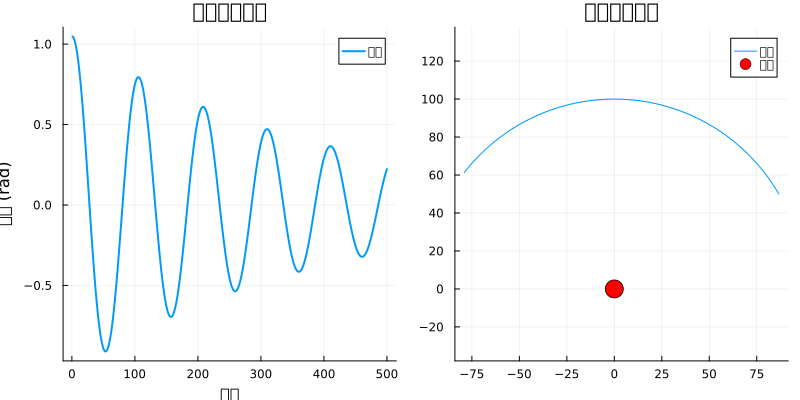

GKS: glyph missing from current font: 25391
GKS: glyph missing from current font: 12426
GKS: glyph missing from current font: 23376
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 35282
GKS: glyph missing from current font: 24230
GKS: glyph missing from current font: 26178
GKS: glyph missing from current font: 38291
GKS: glyph missing from current font: 35282
GKS: glyph missing from current font: 24230
GKS: glyph missing from current font: 25391
GKS: glyph missing from current font: 12426
GKS: glyph missing from current font: 23376
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 36556
GKS: glyph missing from current font: 36321
GKS: glyph missing from current font: 25391
GKS: glyph missing from current font: 12426
GKS: glyph missing from current font: 23376
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 35282
GKS: glyph missing from current font: 24230
GKS: glyph missing from current 

In [11]:
# 振り子オブジェクト
mutable struct Pendulum
    origin::Vector{Float64}
    len::Float64
    angle::Float64
    angular_velocity::Float64
    angular_acceleration::Float64
    damping::Float64
end

function Pendulum(origin, len, angle)
    Pendulum(origin, len, angle, 0.0, 0.0, 0.995)
end

function bob_position(p::Pendulum)
    x = p.origin[1] + p.len * sin(p.angle)
    y = p.origin[2] + p.len * cos(p.angle)
    return [x, y]
end

function update!(p::Pendulum, gravity=0.4)
    # 角加速度 = -(g/L) * sin(θ)
    p.angular_acceleration = -(gravity / p.len) * sin(p.angle)
    p.angular_velocity += p.angular_acceleration
    p.angular_velocity *= p.damping
    p.angle += p.angular_velocity
end

# シミュレーション
pendulum = Pendulum([0.0, 0.0], 100.0, π/3)

angles_pend = Float64[]
bob_positions_pend = Vector{Vector{Float64}}()

for _ in 1:500
    push!(angles_pend, pendulum.angle)
    push!(bob_positions_pend, bob_position(pendulum))
    update!(pendulum)
end

# プロット
p1 = plot(angles_pend, label="角度", linewidth=2, 
          title="振り子の角度", xlabel="時間", ylabel="角度 (rad)")

x_bob = [p[1] for p in bob_positions_pend]
y_bob = [p[2] for p in bob_positions_pend]

p2 = plot(x_bob, y_bob, label="軌跡", linewidth=1, 
          title="振り子の軌跡", aspect_ratio=:equal)
scatter!(p2, [pendulum.origin[1]], [pendulum.origin[2]], 
         markersize=10, label="支点", color=:red)

plot(p1, p2, layout=(1, 2), size=(800, 400))

### 二重振り子（Double Pendulum）

二重振り子はカオス的な振る舞いを示します。

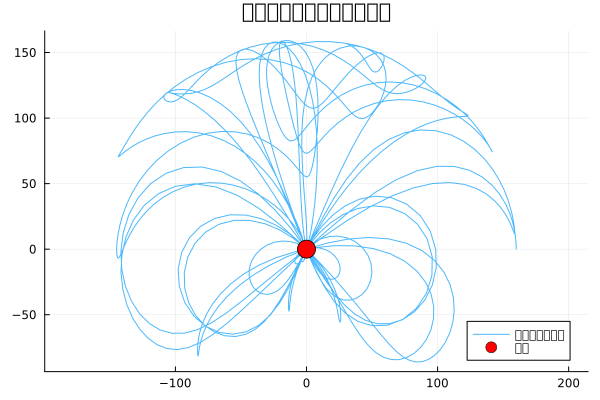

GKS: glyph missing from current font: 20108
GKS: glyph missing from current font: 37325
GKS: glyph missing from current font: 25391
GKS: glyph missing from current font: 12426
GKS: glyph missing from current font: 23376
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 12459
GKS: glyph missing from current font: 12458
GKS: glyph missing from current font: 12473
GKS: glyph missing from current font: 30340
GKS: glyph missing from current font: 36939
GKS: glyph missing from current font: 21205
GKS: glyph missing from current font: 20108
GKS: glyph missing from current font: 37325
GKS: glyph missing from current font: 25391
GKS: glyph missing from current font: 12426
GKS: glyph missing from current font: 23376
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 12459
GKS: glyph missing from current font: 12458
GKS: glyph missing from current font: 12473
GKS: glyph missing from current font: 30340
GKS: glyph missing from current 

In [12]:
# 二重振り子
mutable struct DoublePendulum
    origin::Vector{Float64}
    l1::Float64  # 上の紐の長さ
    l2::Float64  # 下の紐の長さ
    m1::Float64  # 上の質量
    m2::Float64  # 下の質量
    θ1::Float64  # 上の角度
    θ2::Float64  # 下の角度
    ω1::Float64  # 上の角速度
    ω2::Float64  # 下の角速度
end

function DoublePendulum(origin, l1, l2, m1, m2, θ1, θ2)
    DoublePendulum(origin, l1, l2, m1, m2, θ1, θ2, 0.0, 0.0)
end

function positions(dp::DoublePendulum)
    x1 = dp.origin[1] + dp.l1 * sin(dp.θ1)
    y1 = dp.origin[2] + dp.l1 * cos(dp.θ1)
    
    x2 = x1 + dp.l2 * sin(dp.θ2)
    y2 = y1 + dp.l2 * cos(dp.θ2)
    
    return [x1, y1], [x2, y2]
end

function update!(dp::DoublePendulum, g=1.0)
    # 二重振り子の運動方程式（ラグランジュ形式から導出）
    m1, m2 = dp.m1, dp.m2
    l1, l2 = dp.l1, dp.l2
    θ1, θ2 = dp.θ1, dp.θ2
    ω1, ω2 = dp.ω1, dp.ω2
    
    # 角加速度の計算
    Δθ = θ1 - θ2
    
    denom1 = (m1 + m2) * l1 - m2 * l1 * cos(Δθ)^2
    denom2 = (l2 / l1) * denom1
    
    α1 = (m2 * l1 * ω1^2 * sin(Δθ) * cos(Δθ) +
          m2 * g * sin(θ2) * cos(Δθ) +
          m2 * l2 * ω2^2 * sin(Δθ) -
          (m1 + m2) * g * sin(θ1)) / denom1
    
    α2 = (-m2 * l2 * ω2^2 * sin(Δθ) * cos(Δθ) +
          (m1 + m2) * g * sin(θ1) * cos(Δθ) -
          (m1 + m2) * l1 * ω1^2 * sin(Δθ) -
          (m1 + m2) * g * sin(θ2)) / denom2
    
    dp.ω1 += α1
    dp.ω2 += α2
    dp.θ1 += dp.ω1
    dp.θ2 += dp.ω2
end

# シミュレーション
dp = DoublePendulum([0.0, 0.0], 80.0, 80.0, 1.0, 1.0, π/2, π/2)

pos1_history = Vector{Vector{Float64}}()
pos2_history = Vector{Vector{Float64}}()

for _ in 1:1000
    p1, p2 = positions(dp)
    push!(pos1_history, p1)
    push!(pos2_history, p2)
    update!(dp)
end

# 軌跡をプロット
x1 = [p[1] for p in pos1_history]
y1 = [p[2] for p in pos1_history]
x2 = [p[1] for p in pos2_history]
y2 = [p[2] for p in pos2_history]

plot(x2, y2, label="下の重りの軌跡", linewidth=1, alpha=0.7,
     title="二重振り子のカオス的運動", aspect_ratio=:equal)
scatter!([dp.origin[1]], [dp.origin[2]], markersize=10, label="支点", color=:red)

### 初期条件の微小な違いによるカオス

二重振り子は初期条件に非常に敏感です。わずかな違いが大きく異なる結果をもたらします。

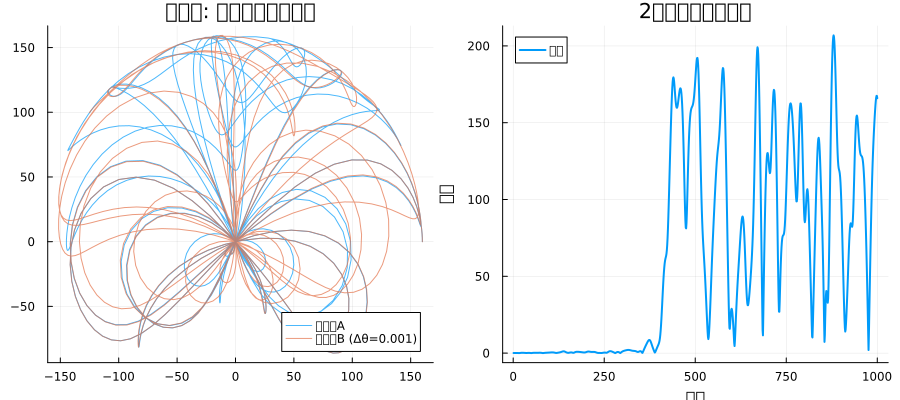

GKS: glyph missing from current font: 12459
GKS: glyph missing from current font: 12458
GKS: glyph missing from current font: 12473
GKS: glyph missing from current font: 21021
GKS: glyph missing from current font: 26399
GKS: glyph missing from current font: 26465
GKS: glyph missing from current font: 20214
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 25935
GKS: glyph missing from current font: 24863
GKS: glyph missing from current font: 24615
GKS: glyph missing from current font: 12388
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 36556
GKS: glyph missing from current font: 36947
GKS: glyph missing from current font: 38291
GKS: glyph missing from current font: 12398
GKS: glyph missing from current font: 36317
GKS: glyph missing from current font: 38626
GKS: glyph missing from current font: 26178
GKS: glyph missing from current font: 38291
GKS: glyph missing from current font: 36317
GKS: glyph missing from current 

In [13]:
# 微小に異なる初期条件で2つの二重振り子をシミュレーション
dp1 = DoublePendulum([0.0, 0.0], 80.0, 80.0, 1.0, 1.0, π/2, π/2)
dp2 = DoublePendulum([0.0, 0.0], 80.0, 80.0, 1.0, 1.0, π/2 + 0.001, π/2)  # θ1が0.001だけ異なる

pos1_a = Vector{Vector{Float64}}()
pos1_b = Vector{Vector{Float64}}()

for _ in 1:1000
    _, p2a = positions(dp1)
    _, p2b = positions(dp2)
    push!(pos1_a, p2a)
    push!(pos1_b, p2b)
    update!(dp1)
    update!(dp2)
end

x1a = [p[1] for p in pos1_a]
y1a = [p[2] for p in pos1_a]
x1b = [p[1] for p in pos1_b]
y1b = [p[2] for p in pos1_b]

p1 = plot(x1a, y1a, label="振り子A", linewidth=1, alpha=0.7)
plot!(p1, x1b, y1b, label="振り子B (Δθ=0.001)", linewidth=1, alpha=0.7)
title!(p1, "カオス: 初期条件の敏感性")

# 距離の時間発展
distances = [norm(pos1_a[i] - pos1_b[i]) for i in 1:length(pos1_a)]
p2 = plot(distances, label="距離", linewidth=2, 
          title="2つの軌道間の距離", xlabel="時間", ylabel="距離")

plot(p1, p2, layout=(1, 2), size=(900, 400))

## まとめ

この章では以下を学びました：

1. **角度と角運動**: 回転運動の基礎
2. **三角関数**: sin, cos, tanと単位円
3. **極座標**: r, θによる位置の表現
4. **単振動**: 周期的な振動現象
5. **バネ**: フックの法則と弾性運動
6. **振り子**: 重力による振動とカオス

これらの概念は物理シミュレーション、アニメーション、ゲーム開発など幅広い分野で活用されます。